In [498]:
import numpy as np
import matplotlib.pyplot as plt


In [499]:
def initial_coefficients(fn, dx, m, L):
    """
    Calculate the complex form fourier series coefficients for the first M
    waves.

    :param fn: function to sample
    :param dx: sampling frequency
    :param m: number of waves to compute
    :param L: We are solving on the interval [-L, L]
    :return: an array containing M Fourier coefficients c_m
    """

    N = L / dx

    coeffs = np.zeros(m, dtype=np.complex_)
    xk = np.arange(0, L + dx, dx)

    # Calculate the coefficients for each wave
    for mi in range(int(-m/2), int(m/2)+1, 1):
        coeffs[mi] = 1/N * sum(fn*np.exp(-1j * mi * 2 * np.pi * xk / L))

    return coeffs


def initial_fourier_graph(range, L, c_coef, function=None, plot=True, err_plot=False):
    """
    Given a range to plot and an array of complex fourier series coefficients,
    this function plots the representation.


    :param range: the x-axis values to plot
    :param c_coef: the complex fourier coefficients, calculated by coefficients()
    :param plot: Default True. Plot the fourier representation
    :param function: For calculating relative error, provide function definition
    :param err_plot: relative error plotted. requires a function to compare solution to
    :return: the fourier series values for the given range
    """
    # Number of coefficients to sum over
    w = len(c_coef)


    # Initialize solution array
    s = np.zeros(len(range))
    for i, ix in enumerate(range):
        for iw in np.arange(int(-w/2), int(w/2)+1, 1):
            s[i] += c_coef[iw] * np.exp(1j * iw * 2 * np.pi * ix / L)

    # If a plot is desired:
    if plot:
        plt.suptitle("Fourier Series Plot")
        plt.xlabel(r"$t$")
        plt.ylabel(r"$f(x)$")
        plt.plot(range, s, label="Fourier Series")

        if err_plot:
            plt.plot(range, function, label="Actual Solution")
            plt.legend()

        plt.show()

    # If error plot is desired:
    if err_plot:
        err = abs(function - s) / function
        plt.suptitle("Plot of Relative Error")
        plt.xlabel("Steps")
        plt.ylabel("Relative Error")
        plt.plot(range, err)
        plt.show()

    return s

In [557]:
Lm = 100
Gm=2*np.pi/Lm
dx = 0.1
xk = np.arange(0, Lm + dx, dx)
x = np.arange(0, Lm + dx, dx)

# number of waves to sum
wvs = 6



/home/ncaffrey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part


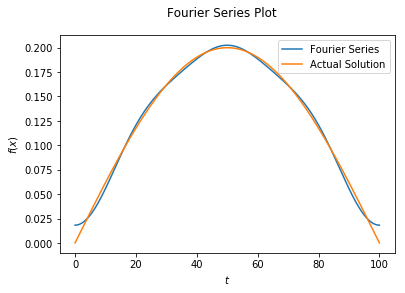

/home/ncaffrey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in true_divide


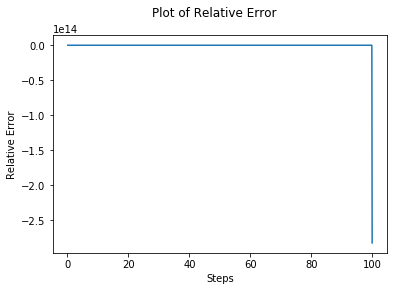

1001


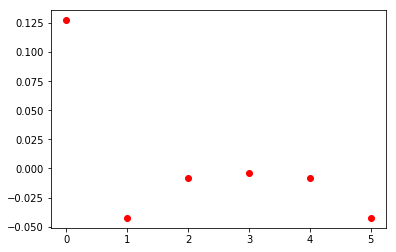

In [558]:
start_sin = 0.2*np.sin(x*(np.pi/l))

initial_c_m = initial_coefficients(start_sin, dx, wvs, l)

# The x range we would like to interpolate function values

initial_uminus = initial_fourier_graph(x, l, initial_c_m, start_sin, err_plot=True)

print(len(start_sin))

plt.plot(initial_c_m, 'ro');

In [550]:
import matplotlib.pyplot as plt
import numpy as np


def coefficients(fn, dx, m, L):
    """
    Calculate the complex form fourier series coefficients for the first M
    waves.

    :param fn: function to sample
    :param dx: sampling frequency
    :param m: number of waves to compute
    :param L: We are solving on the interval [-L, L]
    :return: an array containing M Fourier coefficients c_m
    """

    N = L / dx
    coeffs = np.zeros(m, dtype=np.complex_)
    xk = np.arange(0, L + dx, dx)

    # Calculate the coefficients for each wave
    for mi in range(int(-m/2), int(m/2)+1, 1):
        coeffs[mi] = 1/N * sum(fn*np.exp(-1j * mi * 2 * np.pi * xk / L))

    return coeffs


def fourier_graph(range, L, c_coef, function=None, plot=True, err_plot=False):
    """
    Given a range to plot and an array of complex fourier series coefficients,
    this function plots the representation.


    :param range: the x-axis values to plot
    :param c_coef: the complex fourier coefficients, calculated by coefficients()
    :param plot: Default True. Plot the fourier representation
    :param function: For calculating relative error, provide function definition
    :param err_plot: relative error plotted. requires a function to compare solution to
    :return: the fourier series values for the given range
    """
    # Number of coefficients to sum over
    w = len(c_coef)


    # Initialize solution array
    s = np.zeros(len(range))
    for i, ix in enumerate(range):
        for iw in np.arange(int(-w/2), int(w/2)+1, 1):
            s[i] += c_coef[iw] * np.exp(1j * iw * 2 * np.pi * ix / L)

    # If a plot is desired:
    if plot:
        plt.suptitle("Fourier Series Plot")
        plt.xlabel(r"$t$")
        plt.ylabel(r"$f(x)$")
        plt.plot(range, s, label="Fourier Series")

        if err_plot:
            plt.plot(range, function, label="Actual Solution")
            plt.legend()

        plt.show()

    # If error plot is desired:
    if err_plot:
        err = abs(function(range) - s) / function(range)
        plt.suptitle("Plot of Relative Error")
        plt.xlabel("Steps")
        plt.ylabel("Relative Error")
        plt.plot(range, err)
        plt.show()

    return s



In [559]:
V0 = 1e-7
kap = 1
def Un(fn, m):
    un = np.zeros(m, dtype=np.complex_)
    for mi in range(int(-m/2), int(m/2)+1, 1):
        if mi == 0:
            un[mi] = 0 + 0*1j
        else:
            un[mi] = -((2*2*np.pi*(1/dx)*V0)/(kap*(mi*Gm)**2))*fn[mi]
    return un

/home/ncaffrey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part


True
400


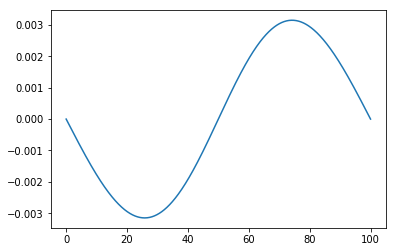

In [560]:


uminus = initial_uminus
#uminus = new_uminus

new_uminus=np.empty_like(uminus)

ww=np.allclose(uminus,new_uminus,rtol=1e-8)

while ww==False:
    sin_fun = np.sin(Gm * xk + (2*np.pi/dx)*uminus)
    f_m = coefficients(sin_fun, dx, wvs, Lm)

    new_un = Un(f_m, wvs)
    new_uminus = fourier_graph(x, Lm, new_un, plot=False)
    
    ww=np.allclose(uminus,new_uminus,rtol=1e-5)
    if ww==False:
        uminus = np.copy(new_uminus)
    if ww==True:
        print(ww)
        print(j)
        break

    
    
plt.plot(x,new_uminus)



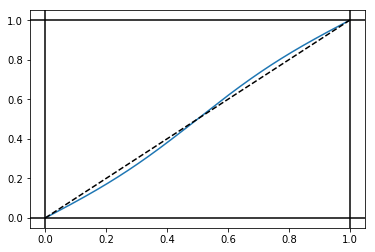

In [561]:
u1 = -new_uminus/2
u2 = new_uminus/2

#plt.plot(x, final_uminus)


delta = (dx/Lm)*x + u2 - u1


plt.plot(x/Lm, delta/dx)
plt.plot(x/Lm, x/Lm, color='k', linestyle='--')

plt.axhline(y=1, color='k', linestyle='-')
plt.axvline(x=1, color='k', linestyle='-')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')




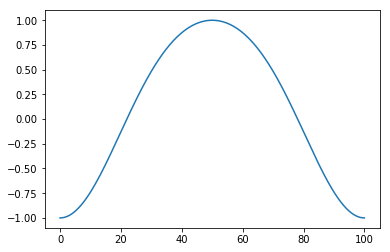

In [562]:
plt.plot(x, -np.cos(Gm*x + (2*np.pi/dx)*(u1-u2)))